# TD10 : Régression logistique

In [69]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import *

## 1.1 Régression logistique

In [70]:
synthpara = pd.read_csv('data/SynthPara_n1000_p2.csv')
synthpara.head()

,X1,X2,z
0,3.119353,7.100552,B
1,-3.850261,-4.934919,A
2,-4.214494,-7.396423,A
3,3.197394,4.783222,B
4,-4.296943,-4.839382,A


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


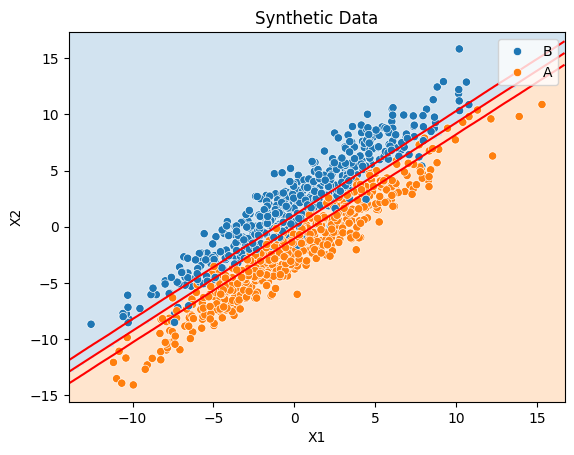

In [71]:
log_reg = LogisticRegression()
X = synthpara[['X1', 'X2']]
y = synthpara['z']
log_reg.fit(X, y)

sns.scatterplot(x='X1', y='X2', hue='z', data=synthpara).set(title='Synthetic Data', xlabel='X1', ylabel='X2')
add_decision_boundary(log_reg, levels=[0.1, 0.5, 0.9])

In [72]:
coef, intercept = log_reg.coef_, log_reg.intercept_
print(f'Coefficients: {coef}')
print(f'Intercept: {intercept}')
print(f"Equation : {coef[0][0]}*X1 + {coef[0][1]}*X2 = {intercept[0]}")

Coefficients: [[-1.98259673  2.13977158]]
Intercept: [-0.0021156]
Equation : -1.9825967315721167*X1 + 2.1397715805225985*X2 = -0.0021155993908259694


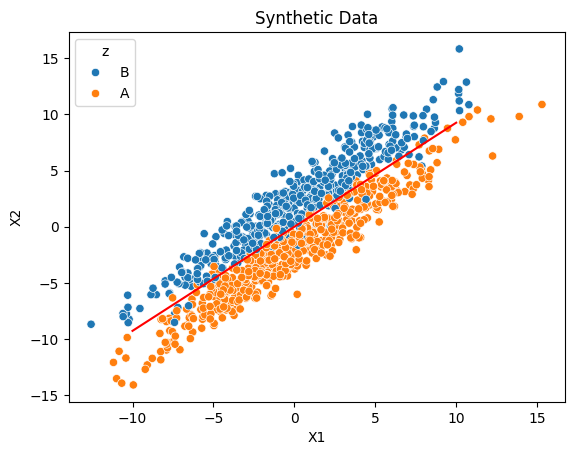

In [73]:
x_plot = np.linspace(-10, 10, 100)
y_plot = (-coef[0][0] * x_plot - intercept) / coef[0][1]
sns.scatterplot(x='X1', y='X2', hue='z', data=synthpara).set(title='Synthetic Data', xlabel='X1', ylabel='X2')
plt.plot(x_plot, y_plot, color='red')
plt.show()

## 1.2 Régression logistique quadratrique

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

log_reg_poly = LogisticRegression()
log_reg_poly.fit(X_poly, y)


LogisticRegression()

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())
pipe.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


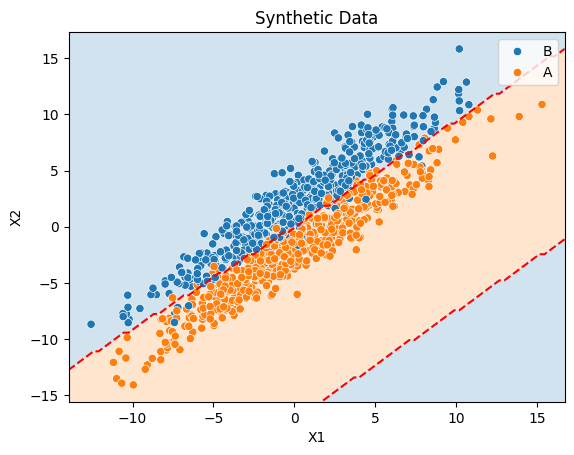

In [76]:
sns.scatterplot(x='X1', y='X2', hue='z', data=synthpara).set(title='Synthetic Data', xlabel='X1', ylabel='X2')
add_decision_boundary(pipe)

In [77]:
coef, intercept = pipe.named_steps['logisticregression'].coef_, pipe.named_steps['logisticregression'].intercept_
print(f'Coefficients: {coef}')
print(f'Intercept: {intercept}')
print(f"Equation : {coef[0][0]}*X1 + {coef[0][1]}*X2 + {coef[0][2]}*X1^2 + {coef[0][3]}*X1*X2 + {coef[0][4]}*X2^2 = {intercept[0]}")

Coefficients: [[-0.02166256 -2.01495273  2.17954623  0.11268801 -0.242947    0.1268688 ]]
Intercept: [-0.02055726]
Equation : -0.02166255992560387*X1 + -2.0149527272216674*X2 + 2.1795462329630686*X1^2 + 0.11268801408174893*X1*X2 + -0.24294699505866552*X2^2 = -0.020557259399982243


## 1.3 Implémentation de la régression logistique binaire

In [78]:
from src.logistic_regression import LogisticRegression2

log_reg = LogisticRegression2()
log_reg.fit(X, y)

coef, intercept = log_reg.coef_, log_reg.intercept_
print(f'Coefficients: {coef}')
print(f'Intercept: {intercept}')

Coefficients: [-2.07771761  2.23897179]
Intercept: -0.0033941605385200708


In [79]:
# Comparaison avec le vrai modèle

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty=None)
log_reg.fit(X, y)
log_reg.coef_, log_reg.intercept_

(array([[-2.07775222,  2.23900273]]), array([-0.00304966]))

## 1.4 Régression logistique sur données transformées

In [80]:
synth1 = pd.read_csv('data/Synth1-2000.csv')
X = synth1[['X1', 'X2']]
y = synth1['y']
synth1.head()

,X1,X2,y
0,-0.392045,0.273869,0
1,1.436796,0.322912,0
2,0.445550,0.869794,1
3,0.572708,-1.082444,1
4,0.594020,-0.306285,1


[Text(0.5, 1.0, 'Synthetic Data'), Text(0.5, 0, 'X1'), Text(0, 0.5, 'X2')]

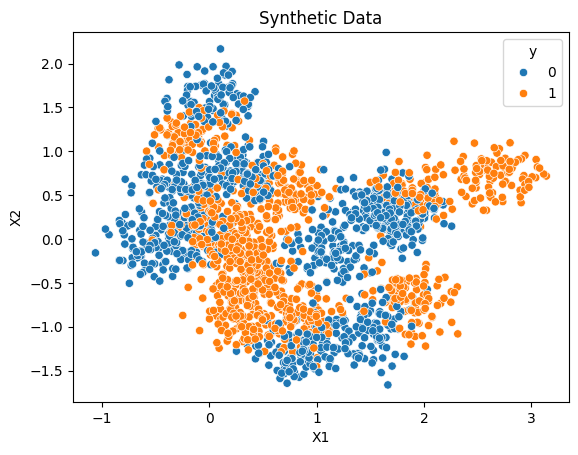

In [81]:
sns.scatterplot(x='X1', y='X2', hue='y', data=synth1).set(title='Synthetic Data', xlabel='X1', ylabel='X2')

[Text(0.5, 1.0, 'Synthetic Data'), Text(0.5, 0, 'X1'), Text(0, 0.5, 'X2')]

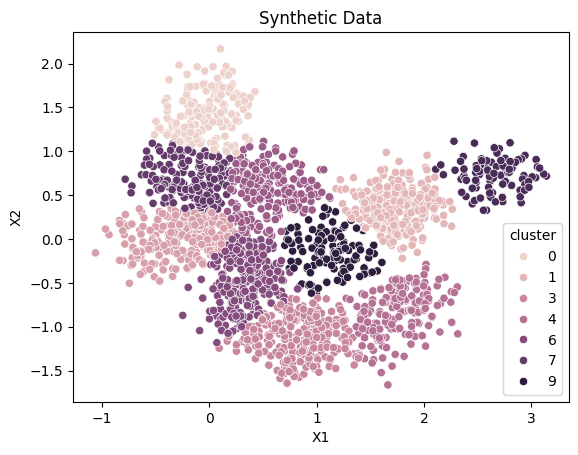

In [97]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
synth1['cluster'] = kmeans.labels_

sns.scatterplot(x='X1', y='X2', hue='cluster', data=synth1).set(title='Synthetic Data', xlabel='X1', ylabel='X2')

In [98]:
from sklearn.metrics import pairwise_distances

centers = kmeans.cluster_centers_
distances = pairwise_distances(X, centers)

In [99]:
from src._transformer import distances_to_centers
from sklearn.preprocessing import FunctionTransformer

func = distances_to_centers(centers)
transformer = FunctionTransformer(func)
transformer

FunctionTransformer(func=<function distances_to_centers.<locals>.distances_to_centers0 at 0x0000019184D4CC10>)

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(transformer, LogisticRegression())
pipe.fit(X, y)


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function distances_to_centers.<locals>.distances_to_centers0 at 0x0000019184D4CC10>)),
                ('logisticregression', LogisticRegression())])

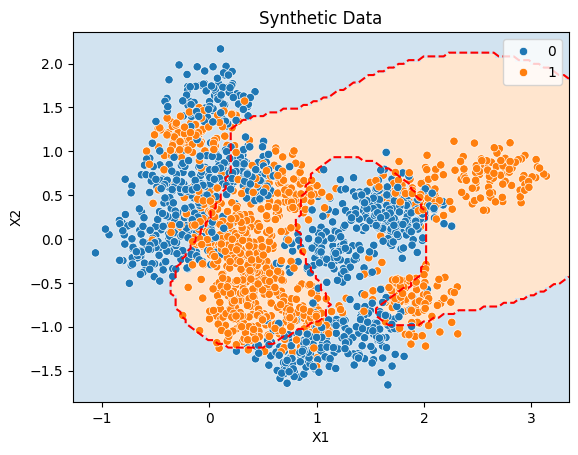

In [101]:
sns.scatterplot(x='X1', y='X2', hue='y', data=synth1).set(title='Synthetic Data', xlabel='X1', ylabel='X2')
add_decision_boundary(pipe)

In [102]:
from src.custom_transformer import CustomTransformer

pipeline = make_pipeline(CustomTransformer(k), LogisticRegression())

pipeline.fit(X, y)

Pipeline(steps=[('customtransformer', CustomTransformer(n_clusters=10)),
                ('logisticregression', LogisticRegression())])

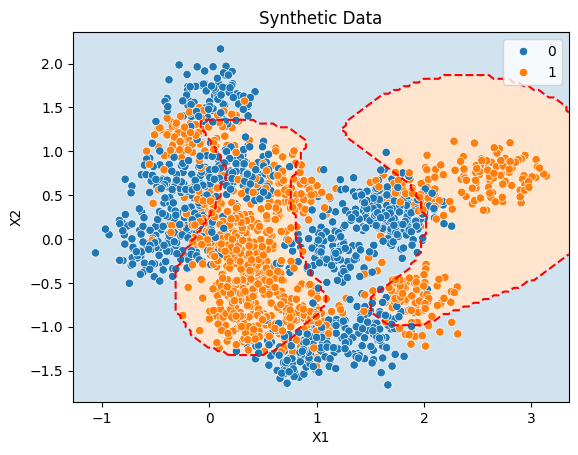

In [103]:
sns.scatterplot(x='X1', y='X2', hue='y', data=synth1).set(title='Synthetic Data', xlabel='X1', ylabel='X2')
add_decision_boundary(pipeline)

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

pipe = Pipeline(
    (
        ("KMeans", CustomTransformer(2)),
        ("LogReg", LogisticRegression()),
    )
)

param_grid = {
    "KMeans__n_clusters": [i for i in range(2, 20)],
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('KMeans',
                                        CustomTransformer(n_clusters=2)),
                                       ('LogReg', LogisticRegression()))),
             param_grid={'KMeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18,
                                                19]},
             scoring='accuracy')

In [121]:
# Afficher la grille de recherche
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.sort_values(by="rank_test_score").head(20)

# Intervalle de confiance à 68% sur le meilleur taux
mean = grid_results.loc[grid_results["rank_test_score"] == 1, "mean_test_score"].values[0]
std = grid_results.loc[grid_results["rank_test_score"] == 1, "std_test_score"].values[0]
interval = (mean - std, mean + std)
print(interval)

# Sélection des modèles dont le taux est dans l'intervalle
good_models = grid_results[
    (grid_results["mean_test_score"] >= interval[0])
    & (grid_results["mean_test_score"] <= interval[1])
]
best_model = good_models.sort_values(by="rank_test_score").iloc[0]
best_k = best_model["param_KMeans__n_clusters"]
best_model

(0.7899843826219531, 0.822015617378047)


mean_fit_time                                 0.064411
std_fit_time                                  0.005282
mean_score_time                               0.001786
std_score_time                                 0.00051
param_KMeans__n_clusters                            17
params                      {'KMeans__n_clusters': 17}
split0_test_score                                0.815
split1_test_score                                 0.79
split2_test_score                               0.8125
split3_test_score                                0.785
split4_test_score                               0.8275
mean_test_score                                  0.806
std_test_score                                0.016016
rank_test_score                                      1
Name: 15, dtype: object

## 2. Analyse des coefficients

In [125]:
Xy = pd.read_csv("data/SAheart.csv")
X = Xy.iloc[:, 1:-1]
y = Xy.iloc[:, -1]
X = X.replace({"famhist": {"Present": 1, "Absent": 0}})
X = X.drop(columns=["adiposity", "typea"])
X["intercept"] = 1

X.head()

,sbp,tobacco,ldl,famhist,obesity,alcohol,age,intercept
0,160,12.00,5.73,1,25.30,97.20,52,1
1,144,0.01,4.41,0,28.87,2.06,63,1
2,118,0.08,3.48,1,29.14,3.81,46,1
3,170,7.50,6.41,1,31.99,24.26,58,1
4,134,13.60,3.50,1,25.99,57.34,49,1


In [126]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

coef, intercept = log_reg.coef_, log_reg.intercept_
print(f'Coefficients: {coef}')
print(f'Intercept: {intercept}')

Coefficients: [[ 3.00061786e-03  7.98792261e-02  1.84689220e-01  8.90796056e-01
  -4.38831729e-02  6.96693512e-04  4.16867801e-02 -1.65781939e+00]]
Intercept: [-1.76383437]
